# Disseration Experiment FriedB
# Friedman Analysis + W Signed Test - April 2024¶
Ciaran Finnegan April 2024

This is the corrected final statistical analysis with the XAI experiment outputs as input test data.

The purpose was to correct an error in the original statistical analysis.

The 20 results from the five custom evaluation metrics in each of the four XAI technique XLs are read directly as inout.

The inout data is not averaged per XAI method, and the significance tests are conducted using all the sample data directly.

# Import Libraries + Custom Functions

## Import Libraries

In [1]:
import pandas as pd
from scipy.stats import friedmanchisquare
from scipy.stats import wilcoxon
import itertools
from itertools import combinations
from tabulate import tabulate
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

#### Suppress Warnings to clean up output

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=Warning)

# Load Excel Data

In [3]:
# Load the full datasets from each file, focusing on the relevant columns
columns_to_load = ['XAI_Identity', 'XAI_Stability', 'XAI_Seperability', 'XAI_Similairity', 'Comp_Efficiency']

#### Set file path for input data from each XAI technique experiment

In [4]:
shap_file_path = 'SHAP_XAI_Metrics_Experiments Formatted cf v1-1 250324.xlsx'

In [5]:
lime_file_path = 'LIME_XAI_Metrics_Experiments Formatted cf v1-1 250324.xlsx'

In [6]:
anchors_file_path = 'ANCHOR_XAI_Metrics_Experiments Formatted cf v1-1 250324.xlsx'

In [7]:
dice_file_path = 'DiCE_XAI_Metrics_Experiments Formatted cf v1-1 250324.xlsx'

In [8]:
# Load the first few rows of each file to examine their structure
shap_df_preview = pd.read_excel(shap_file_path, nrows=5)
lime_df_preview = pd.read_excel(lime_file_path, nrows=5)
anchors_df_preview = pd.read_excel(anchors_file_path, nrows=5)
dice_df_preview = pd.read_excel(dice_file_path, nrows=5)

In [9]:
# Display the structure of the data from each file
shap_df_preview.head(), lime_df_preview.head(), anchors_df_preview.head(), dice_df_preview.head()

(   Sample Number  XAI_Identity  XAI_Stability  XAI_Seperability  \
 0              1     40.000000      87.692308         96.923077   
 1              2     46.153846      76.923077         96.923077   
 2              3     49.230769      67.692308         90.769231   
 3              4     36.923077      75.384615         93.846154   
 4              5     47.692308      83.076923        100.000000   
 
    XAI_Similairity  Comp_Efficiency  
 0         0.274628       384.508690  
 1         0.231959       386.190979  
 2         0.207120       384.938421  
 3         0.263651       386.692740  
 4         0.280038       384.335014  ,
    Sample Number  XAI_Identity  XAI_Stability  XAI_Seperability  \
 0              1     10.821400      26.232300        100.000000   
 1              2      3.076923      78.461538         90.769231   
 2              3      3.076923      60.000000        100.000000   
 3              4      4.615385      33.846154         93.846154   
 4             

In [10]:
# Load all experiment data
shap_df = pd.read_excel(shap_file_path, usecols=columns_to_load)
lime_df = pd.read_excel(lime_file_path, usecols=columns_to_load)
anchors_df = pd.read_excel(anchors_file_path, usecols=columns_to_load)
dice_df = pd.read_excel(dice_file_path, usecols=columns_to_load)

In [11]:
# Combine the data into a single DataFrame for analysis, with an added technique column
shap_df['Technique'] = 'SHAP'
lime_df['Technique'] = 'LIME'
anchors_df['Technique'] = 'ANCHORS'
dice_df['Technique'] = 'DiCE'

In [12]:
combined_df = pd.concat([shap_df, lime_df, anchors_df, dice_df], ignore_index=True)

In [13]:
# Prepare the data for Friedman test
# The data needs to be reshaped such that each row represents a single measurement of a technique across all metrics
combined_df_melt = combined_df.melt(id_vars=['Technique'], var_name='Metric', value_name='Score')

In [14]:
# Show sample of loaded data thathas been reshaped
combined_df_melt.head()

,Technique,Metric,Score
0,SHAP,XAI_Identity,40.000000
1,SHAP,XAI_Identity,46.153846
2,SHAP,XAI_Identity,49.230769
3,SHAP,XAI_Identity,36.923077
4,SHAP,XAI_Identity,47.692308


In [15]:
# Load the data from an Excel file
#data = pd.read_excel('XAI_StatTest2_RowLables_v2.xlsx')

In [16]:
# Extracting the values for each XAI method
#shap = data['SHAP'].values
#lime = data['LIME'].values
#anchors = data['ANCHOR'].values
#dice = data['DiCE'].values

In [17]:
#data

# Friedman Analysis

## Perform Friedman Test

In [18]:
# Extract unique metrics
metrics = combined_df_melt['Metric'].unique()

In [19]:
# Initialize a dictionary to hold Friedman test results
friedman_results = {}

In [20]:
# Perform Friedman test for each metric
for metric in metrics:
    # Extract scores for each technique
    scores = [combined_df_melt[(combined_df_melt['Technique'] == technique) 
                               & (combined_df_melt['Metric'] == metric)]['Score'].values 
                               for technique in ['SHAP', 'LIME', 'ANCHORS', 'DiCE']]
    
    # Perform the Friedman test
    statistic, p_value = friedmanchisquare(*scores)
    
    # Store results
    friedman_results[metric] = {
        'Statistic': statistic,
        'p-value': p_value,
        'Significant Difference': 'Yes' if p_value < 0.05 else 'No'
    }

In [21]:
# Convert results to DataFrame for easier viewing
friedman_results_df = pd.DataFrame(friedman_results).T

In [22]:
# Performing the Friedman test
#friedman_test_result = friedmanchisquare(shap, lime, anchors, dice)

## Present Friedman Analysis

In [23]:
friedman_results_df

,Statistic,p-value,Significant Difference
XAI_Identity,47.76,0.0,Yes
XAI_Stability,1.56,0.668493,No
XAI_Seperability,55.4,0.0,Yes
XAI_Similairity,60.0,0.0,Yes
Comp_Efficiency,60.0,0.0,Yes


In [24]:
# Prepare Friedman test results for tabulate
#friedman_results = [["Statistic", "{:.4f}".format(friedman_test_result.statistic)],
#                    ["P-Value", "{:.4f}".format(friedman_test_result.pvalue)]]

#print("Friedman Test Results:")
#print(tabulate(friedman_results, headers="firstrow", tablefmt="fancy_grid"))

# Plot Analysis

## Generate Plots

### Bar Charts 

Create bar charts for each metric, showing the average score for each XAI technique. This will help illustrate the differences in performance across the techniques for the metrics where significant differences were identified.

In [25]:
# Set the style of the seaborn
sns.set(style="whitegrid")

In [26]:
# Filter out the metrics with significant differences for visualization
significant_metrics = friedman_results_df[friedman_results_df['Significant Difference'] == 'Yes'].index.tolist()

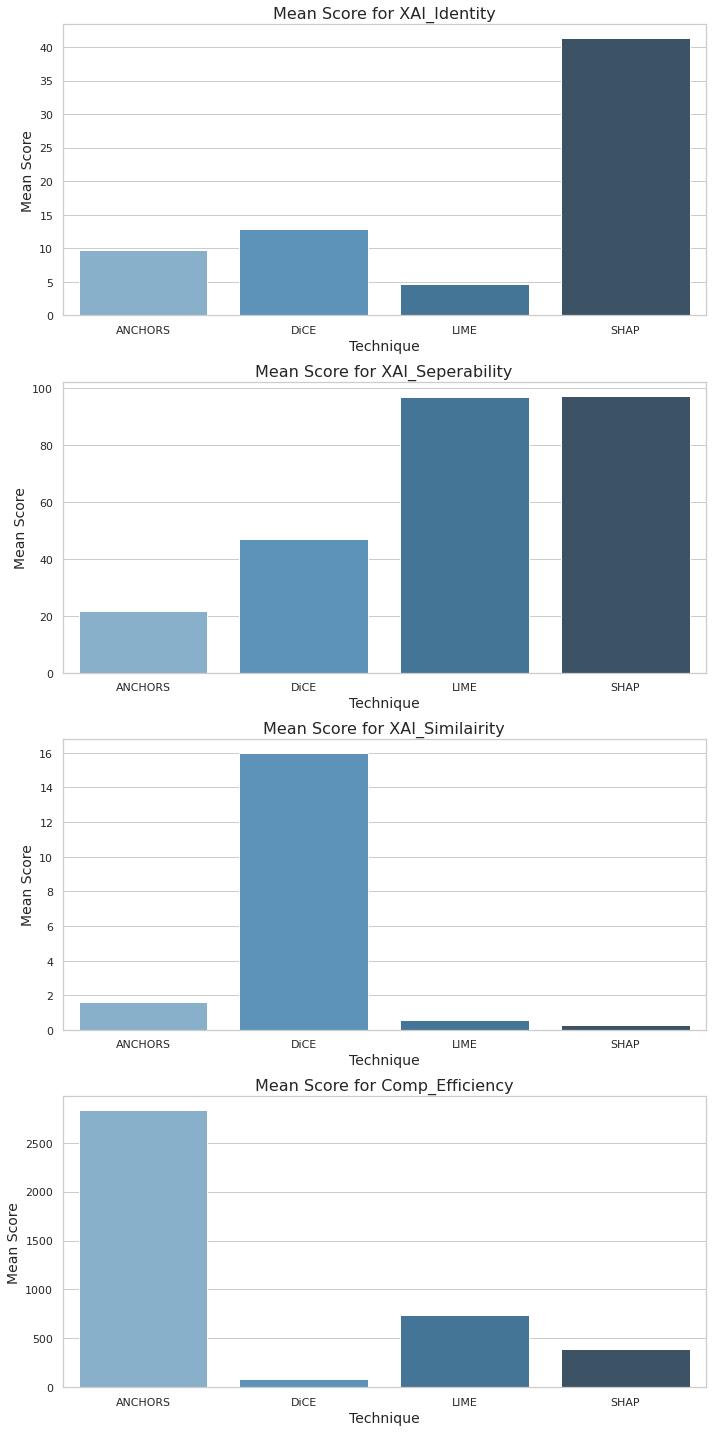

In [27]:
# Plotting
fig, axes = plt.subplots(len(significant_metrics), 1, figsize=(10, 5 * len(significant_metrics)))

if len(significant_metrics) == 1:  # Adjust if only one metric is significant to avoid indexing error
    axes = [axes]

for ax, metric in zip(axes, significant_metrics):
    # Data preparation for plotting
    data_to_plot = combined_df_melt[combined_df_melt['Metric'] == metric].groupby(['Technique'])['Score'].mean().reset_index()
    sns.barplot(x='Technique', y='Score', data=data_to_plot, ax=ax, palette="Blues_d")
    ax.set_title(f'Mean Score for {metric}', fontsize=16)
    ax.set_ylabel('Mean Score', fontsize=14)
    ax.set_xlabel('Technique', fontsize=14)

plt.tight_layout()
plt.show()

After the statistical analysis, we will generate both a box plot and a violin plot for your data. 
These plots will help visualize the distribution and spread of the data across the four XAI methods.

### Box Plot

In the Box Plot, the x-axis now correctly represents the four XAI methods (SHAP, LIME, ANCHORS, and DiCE):

The box shows the interquartile range (IQR), indicating the middle 50% of scores for each method.

The median is represented by the line within the box.

The whiskers extend to show the range of the data, excluding outliers.

Any outliers are shown as individual points beyond the whiskers.

This plot allows us to compare the central tendency and variability in scores across the different XAI methods.

In [28]:
# Load the data from an Excel file
data = pd.read_excel('XAI_StatTest2_RowLables_v1.xlsx')

In [29]:
# Extracting the values for each XAI method
shap = data['SHAP'].values
lime = data['LIME'].values
anchors = data['ANCHOR'].values
dice = data['DiCE'].values

In [30]:
# Reshape the data for plotting
reshaped_data = pd.melt(data, id_vars=['Metric'], value_vars=['SHAP', 'LIME', 'ANCHOR', 'DiCE'],
                        var_name='Method', value_name='Score')

In [31]:
reshaped_data

,Metric,Method,Score
0,Identity,SHAP,41.307692
1,Stability,SHAP,58.000000
2,Seperability,SHAP,97.384615
3,Similairity,SHAP,0.280949
4,Comp_Efficiency,SHAP,390.281732
5,Identity,LIME,4.617993
6,Stability,LIME,49.773153
7,Seperability,LIME,96.769231
8,Similairity,LIME,0.589751
9,Comp_Efficiency,LIME,738.144645


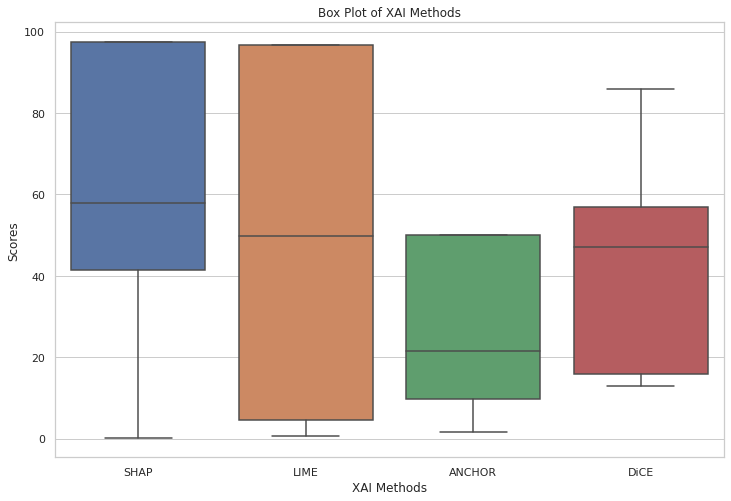

In [32]:
# Creating and displaying a Box Plot
plt.figure(figsize=(12, 8)) # Adjust the figure size as needed
sns.boxplot(x='Method', y='Score', data=reshaped_data, showfliers=False)
plt.title('Box Plot of XAI Methods')
plt.ylabel('Scores')
plt.xlabel('XAI Methods')
plt.show() # Display the first plot

### Violin Plot
In the Violin Plot, similar to the box plot, the x-axis correctly represents the XAI methods:

The width of the plot at different score values indicates the density of scores.

It combines features of the box plot, like the median and IQR, with the kernel density estimation.

This plot provides a fuller picture of the distribution of scores, showing both the range and the density of scores for each method.

Use the "scale='width'" option to render Violin Plot graph

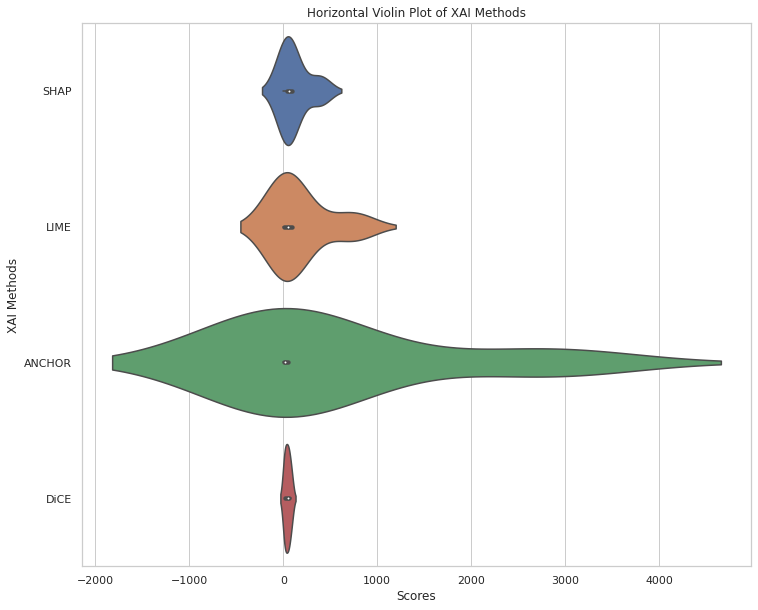

In [33]:
# Creating a horizontal Violin Plot
plt.figure(figsize=(12, 10))
sns.violinplot(x='Score', y='Method', data=reshaped_data, scale='width')
plt.title('Horizontal Violin Plot of XAI Methods')
plt.xlabel('Scores')
plt.ylabel('XAI Methods')
plt.show()

## Plots Summary

These visualizations accurately reflect the distribution of scores across the four XAI methods. 

They allow for a comprehensive comparison, showing not only the range and central tendencies but also the distribution patterns of scores for SHAP, LIME, ANCHORS, and DiCE. 

The box plot highlights the spread and central measures, while the violin plot offers a deeper insight into the density and distribution of the scores.

# Wilcoxon Signed-Rank Test Analysis


The Wilcoxon signed-rank test is a non-parametric test used to compare two related samples to assess whether their population mean ranks differ. 
It's an alternative to the paired t-test when the data cannot be assumed to be normally distributed.

## Wilcoxon Function

Focus on 'XAI_Identity' as an example

In [34]:
# Focus on 'XAI_Identity' as an example
metric_to_analyze = 'XAI_Identity'
data_for_analysis = combined_df_melt[combined_df_melt['Metric'] == metric_to_analyze]

In [35]:
# Techniques to compare
techniques = data_for_analysis['Technique'].unique()

In [36]:
# Pairwise comparisons
pairwise_comparisons = list(itertools.combinations(techniques, 2))

In [37]:
# Initialize a dictionary to store results
wilcoxon_results = {}

In [38]:
# Conduct Wilcoxon signed-rank test for each pair
for pair in pairwise_comparisons:
    scores1 = data_for_analysis[data_for_analysis['Technique'] == pair[0]]['Score'].values
    scores2 = data_for_analysis[data_for_analysis['Technique'] == pair[1]]['Score'].values
    
    # Perform Wilcoxon signed-rank test
    statistic, p_value = wilcoxon(scores1, scores2)
    
    # Store results with Bonferroni correction applied (adjust for 6 comparisons)
    corrected_p_value = p_value * len(pairwise_comparisons)
    wilcoxon_results[pair] = {
        'Statistic': statistic,
        'p-value': corrected_p_value,
        'Significant Difference': 'Yes' if corrected_p_value < 0.05 else 'No'
    }

In [39]:
# Convert results to DataFrame for easier viewing
wilcoxon_results_df = pd.DataFrame(wilcoxon_results).T

In [40]:
wilcoxon_results_df

Statistic   p-value Significant Difference
SHAP    LIME          0.0  0.000011                    Yes
        ANCHORS       0.0  0.000011                    Yes
        DiCE          0.0  0.000011                    Yes
LIME    ANCHORS      25.0  0.010139                    Yes
        DiCE          9.0  0.000378                    Yes
ANCHORS DiCE         62.0  0.683922                     No

## Extend Pairwise Test Function

In [41]:
# Metrics to analyze, excluding 'XAI_Stability'
metrics_to_analyze = ['XAI_Seperability', 'XAI_Similairity', 'Comp_Efficiency']

In [42]:
# Initialize a dictionary to store results for all metrics
all_metrics_wilcoxon_results = {}

In [43]:
for metric in metrics_to_analyze:
    # Extract data for the current metric
    data_for_metric = combined_df_melt[combined_df_melt['Metric'] == metric]
    
    # Dictionary to store results for this metric
    metric_wilcoxon_results = {}
    
    # Conduct Wilcoxon signed-rank test for each pair for this metric
    for pair in pairwise_comparisons:
        scores1 = data_for_metric[data_for_metric['Technique'] == pair[0]]['Score'].values
        scores2 = data_for_metric[data_for_metric['Technique'] == pair[1]]['Score'].values
        
        # Perform Wilcoxon signed-rank test
        statistic, p_value = wilcoxon(scores1, scores2)
        
        # Apply Bonferroni correction (adjust for the number of pairwise comparisons across all metrics)
        total_comparisons = len(pairwise_comparisons) * len(metrics_to_analyze)
        corrected_p_value = p_value * total_comparisons
        
        # Ensure the corrected p-value does not exceed 1
        corrected_p_value = min(corrected_p_value, 1)
        
        metric_wilcoxon_results[pair] = {
            'Statistic': statistic,
            'p-value': corrected_p_value,
            'Significant Difference': 'Yes' if corrected_p_value < 0.05 else 'No'
        }
    
    # Add results for this metric to the overall results
    all_metrics_wilcoxon_results[metric] = metric_wilcoxon_results

In [44]:
# Since the output might be extensive, let's display a summary instead of the full details
summary_results = {metric: pd.DataFrame(results).T['Significant Difference'].value_counts() 
                   for metric, results in all_metrics_wilcoxon_results.items()}

In [45]:
summary_results_df = pd.DataFrame(summary_results)

In [46]:
summary_results_df

,XAI_Seperability,XAI_Similairity,Comp_Efficiency
No,1,NaN,NaN
Yes,5,6.0,6.0


In [50]:
# Reformatting the detailed results for display
detailed_results_dfs = []

In [51]:
for metric, results in all_metrics_wilcoxon_results.items():
    df = pd.DataFrame(results).T.reset_index()
    df.rename(columns={'level_0': 'Technique 1', 'level_1': 'Technique 2', 'Statistic': 'Statistic', 
                       'p-value': 'Corrected p-value', 'Significant Difference': 'Significant'}, inplace=True)
    df['Metric'] = metric
    detailed_results_dfs.append(df[['Metric', 'Technique 1', 'Technique 2', 'Statistic', 'Corrected p-value', 
                                    'Significant']])

In [52]:
# Combine all detailed results into a single DataFrame for display
detailed_results_combined_df = pd.concat(detailed_results_dfs, ignore_index=True).sort_values(by=['Metric', 'Technique 1'])

In [53]:
detailed_results_combined_df

,Metric,Technique 1,Technique 2,Statistic,Corrected p-value,Significant
17,Comp_Efficiency,ANCHORS,DiCE,0.0,0.000034,Yes
15,Comp_Efficiency,LIME,ANCHORS,0.0,0.000034,Yes
16,Comp_Efficiency,LIME,DiCE,0.0,0.000034,Yes
12,Comp_Efficiency,SHAP,LIME,0.0,0.000034,Yes
13,Comp_Efficiency,SHAP,ANCHORS,0.0,0.000034,Yes
14,Comp_Efficiency,SHAP,DiCE,0.0,0.000034,Yes
5,XAI_Seperability,ANCHORS,DiCE,0.0,0.000034,Yes
3,XAI_Seperability,LIME,ANCHORS,0.0,0.000034,Yes
4,XAI_Seperability,LIME,DiCE,0.0,0.000034,Yes
0,XAI_Seperability,SHAP,LIME,48.5,1,No


## Perform Tests

### Density Analysis

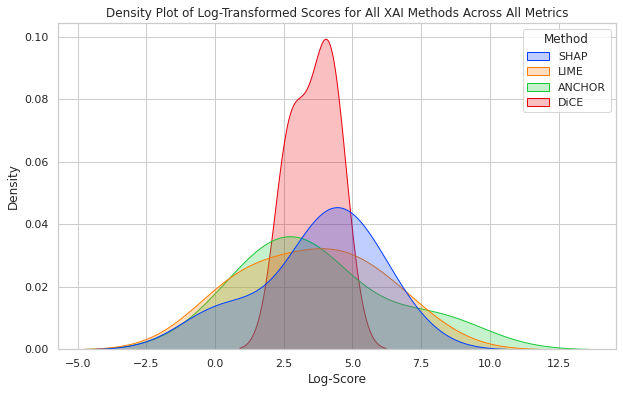

In [48]:
import numpy as np

# Applying a log transformation to the scores
reshaped_data_log = reshaped_data.copy()
reshaped_data_log['Log_Score'] = reshaped_data_log['Score'].apply(lambda x: np.log(x+1))  # Adding 1 to avoid log(0)

# Creating a density plot with log-transformed scores
plt.figure(figsize=(10, 6))
sns.kdeplot(data=reshaped_data_log, x='Log_Score', hue='Method', shade=True, palette="bright")
plt.title('Density Plot of Log-Transformed Scores for All XAI Methods Across All Metrics')
plt.xlabel('Log-Score')
plt.ylabel('Density')
plt.show()